In [110]:
from util.util import load_curves, load_log

# Load Data
n = [1000, 1500, 2000]
m = [1, 2, 5, 10]
st = [1, 1, 2, 5]
data = {}
for _n in n:
    for _mIdx in range(len(m)):
        folder_name = f"../result/price_curve_{st[_mIdx]}_{m[_mIdx]}_{_n}"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{st[_mIdx]}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }
clob_data = {}
for _n in n:
    log = load_log(f"../clob_onchain/logs_{_n}.json")
    clob_data[f"{_n}"] = log

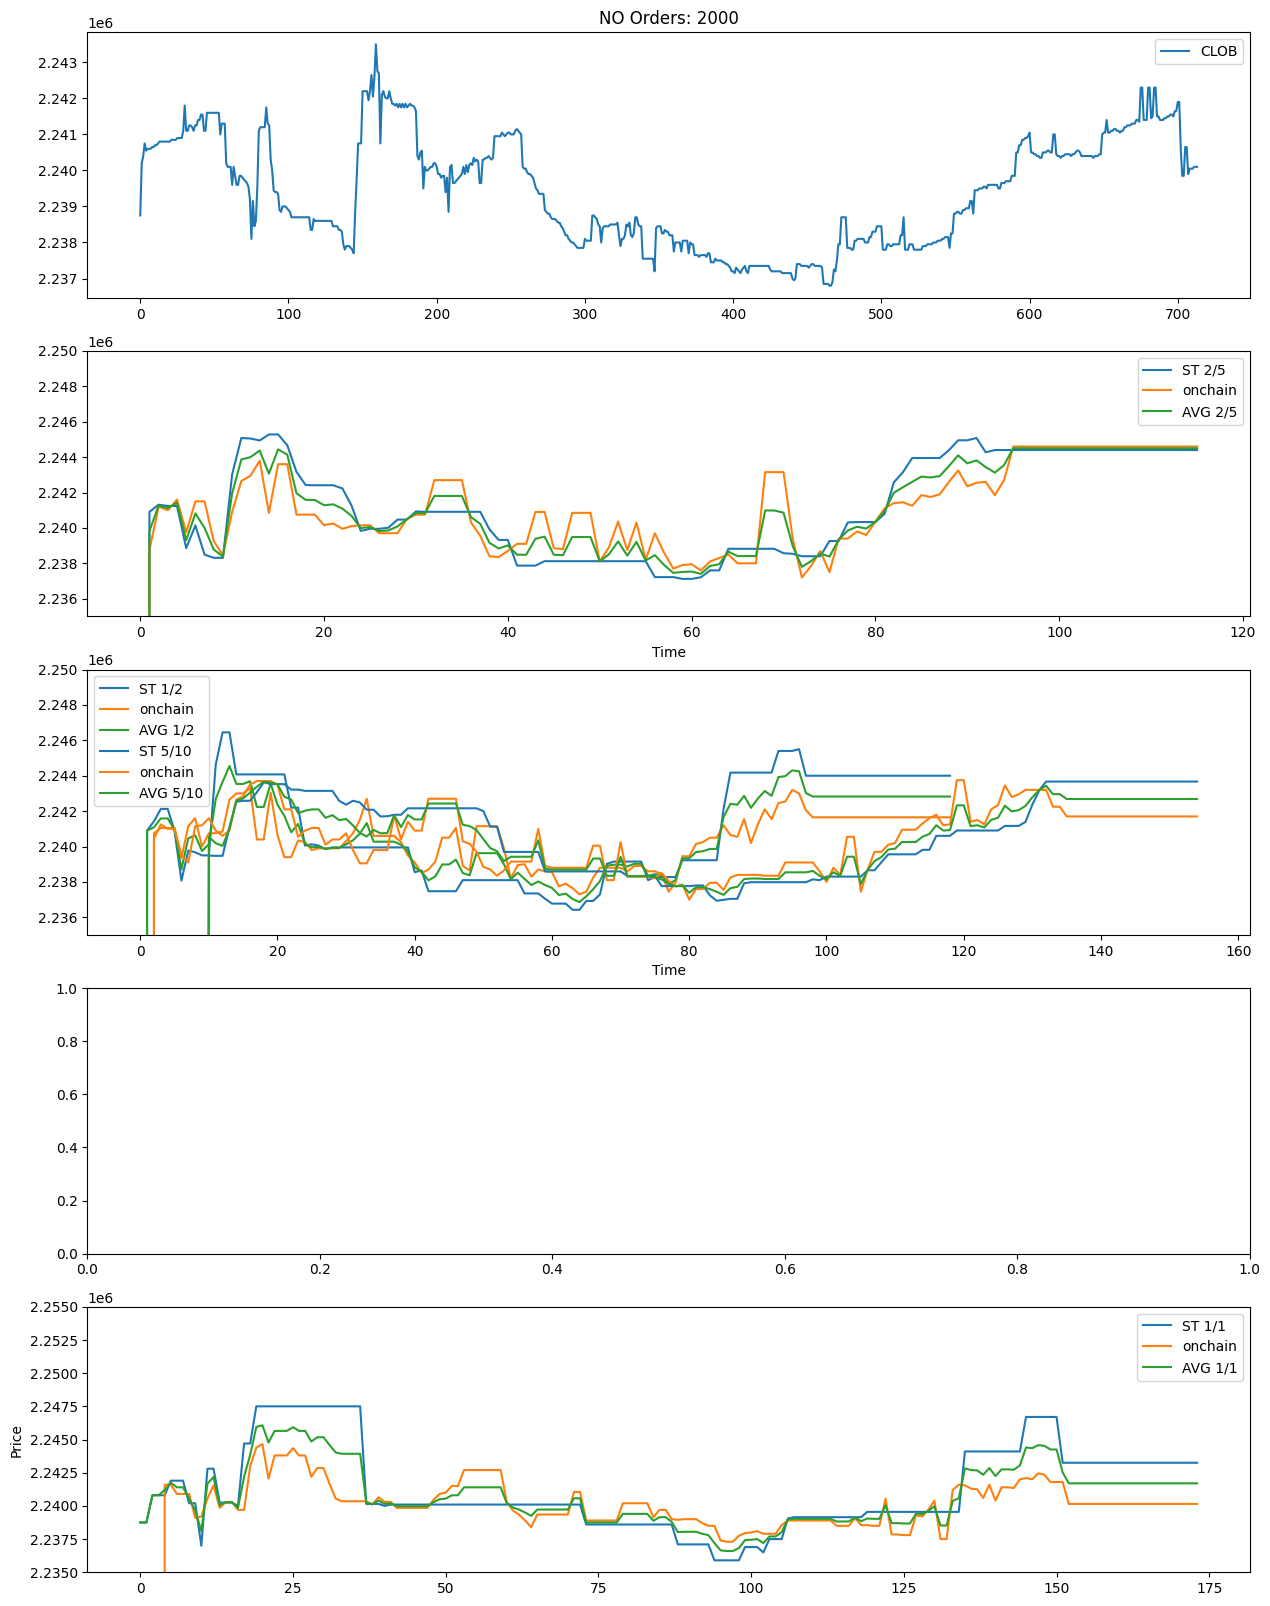

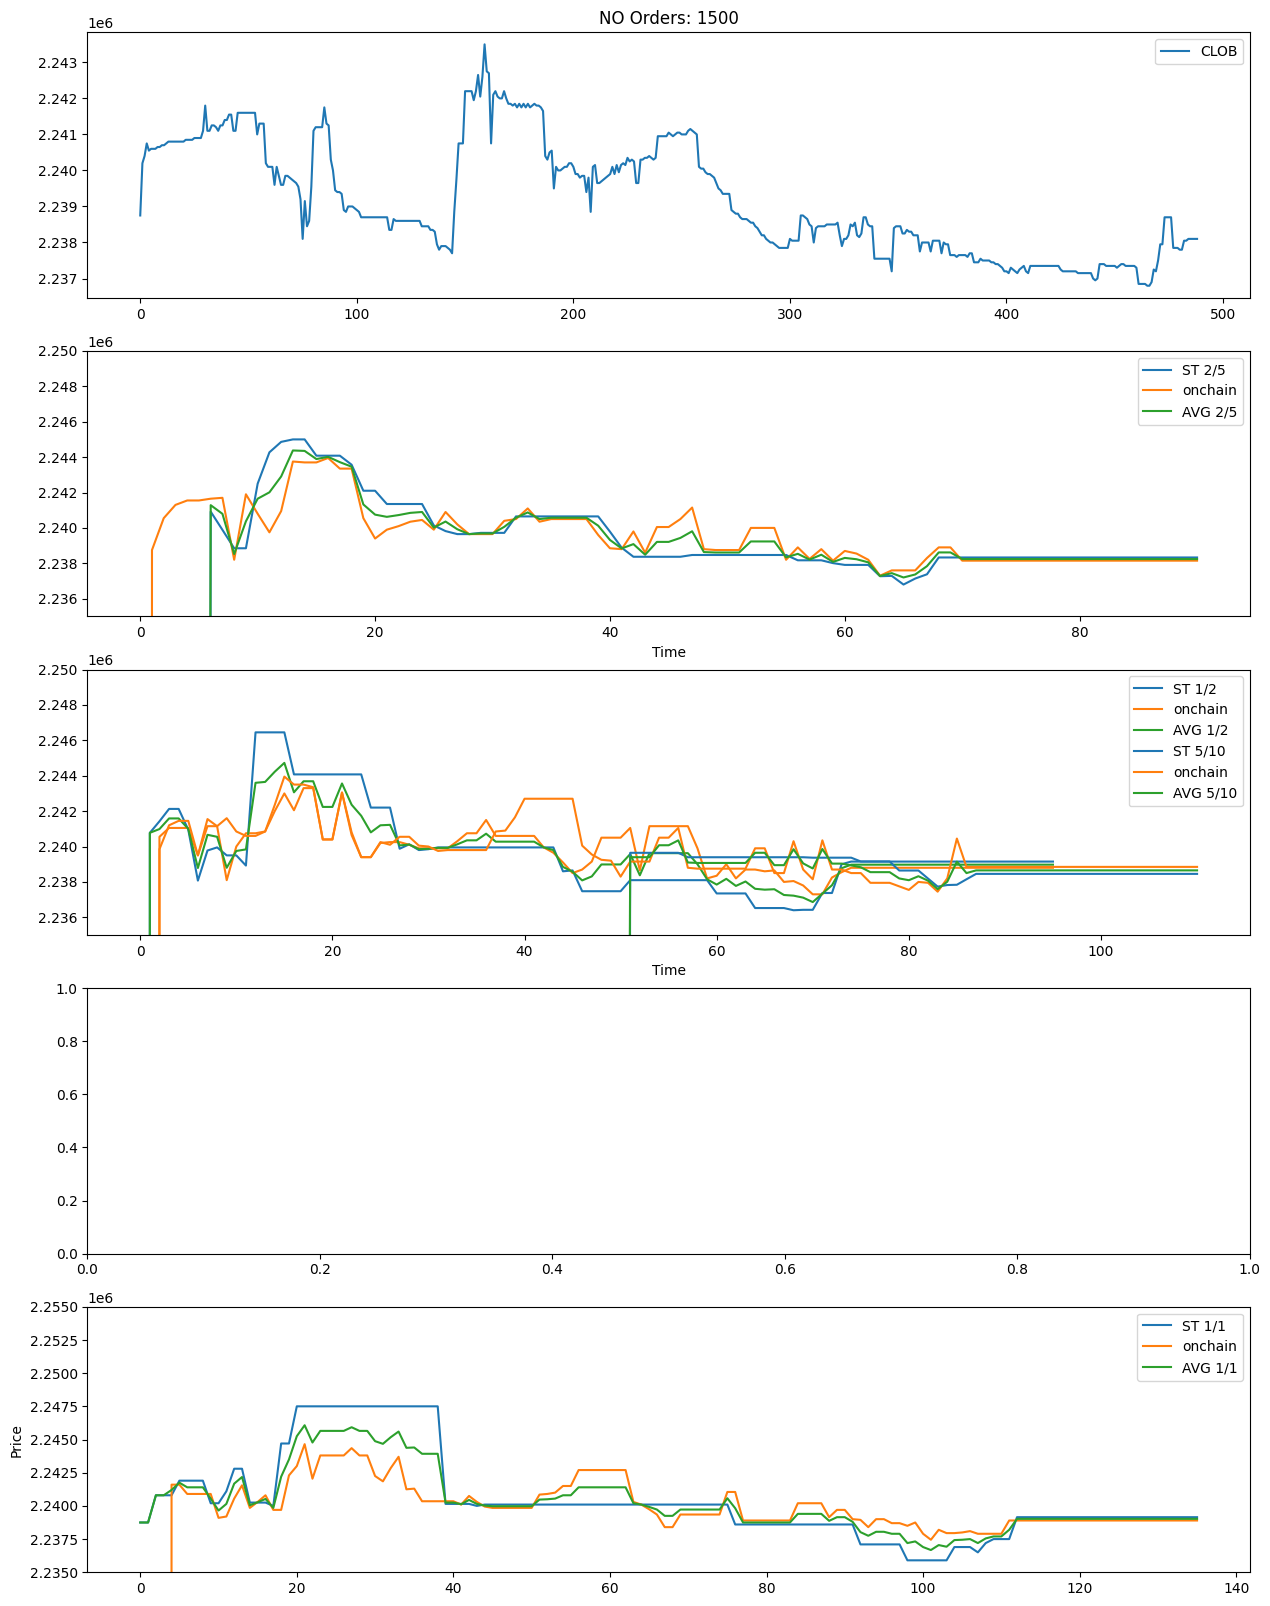

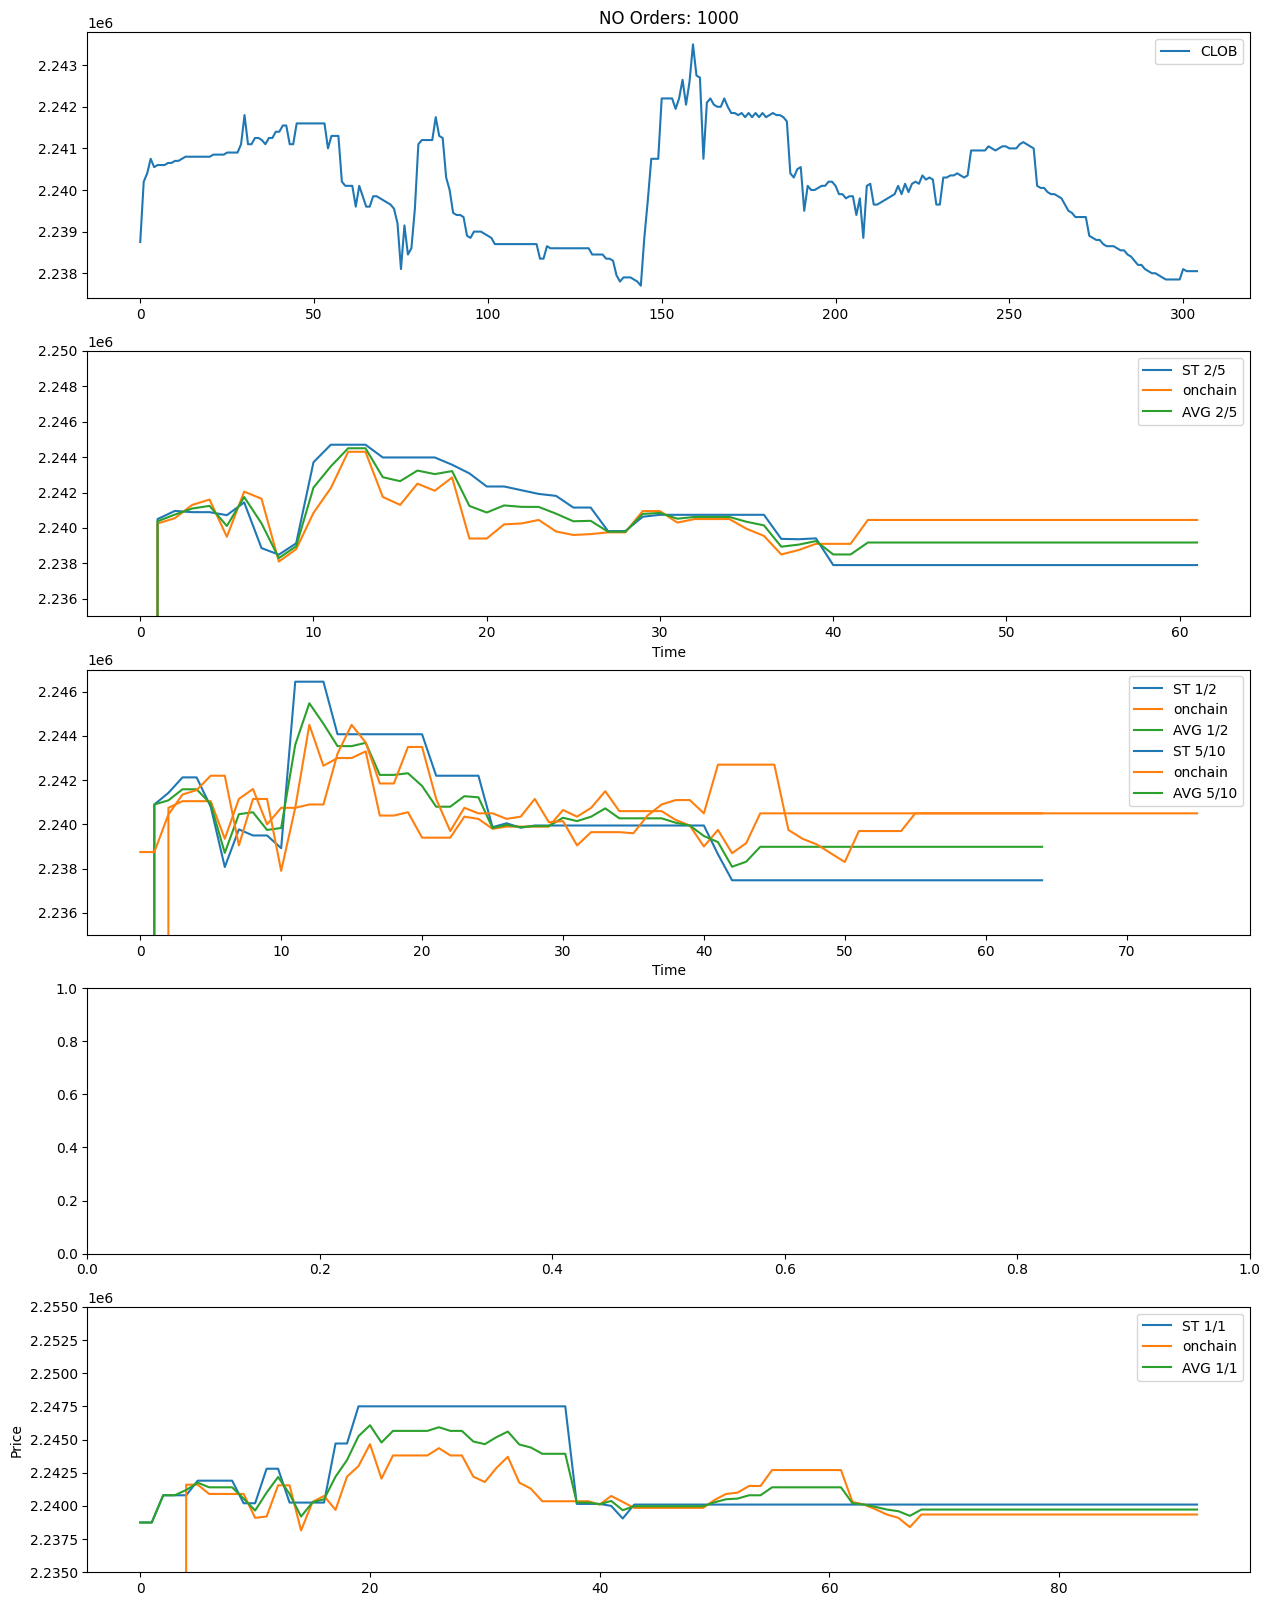

In [111]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
n.reverse()
for _n in n:
    fig, axes = plt.subplots(5, 1, figsize=(15, 20))

    # CLOB
    clob_curve = clob_data[f"{_n}"]["PriceCurve"]
    axes[0].plot(clob_curve, label="CLOB", color=colors[0])
    axes[0].set_title(f"NO Orders: {_n}")
    axes[0].legend()

    chart_idx = [4, 2, 1, 2]
    _curr_idx = 0

    # SEND TO 1/1 MATCHERS
    avg_local_curve_1_1 = data[f"1_1_{_n}"]["avg_local_curves"]
    onchain_curve_1_1 = data[f"1_1_{_n}"]["onchain_curve"]
    _avg = []
    for i in range(len(avg_local_curve_1_1)):
        if onchain_curve_1_1[i] == 0:
            _avg.append(avg_local_curve_1_1[i])
        else:
            _avg.append((avg_local_curve_1_1[i] + onchain_curve_1_1[i]) / 2)
    axes[chart_idx[_curr_idx]].plot(avg_local_curve_1_1, label="ST 1/1", color=colors[0])
    axes[chart_idx[_curr_idx]].plot(onchain_curve_1_1, label="onchain", color=colors[1])
    axes[chart_idx[_curr_idx]].plot(_avg, label="AVG 1/1", color=colors[2])
    axes[chart_idx[_curr_idx]].set_ylim(2.235 * 10**6, 2.255 * 10**6)
    axes[chart_idx[_curr_idx]].set_ylabel("Price")
    axes[chart_idx[_curr_idx]].legend()
    _curr_idx += 1

    # SEND TO 1/2 MATCHERS
    avg_local_curve_1_2 = data[f"1_2_{_n}"]["avg_local_curves"]
    onchain_curve_1_2 = data[f"1_2_{_n}"]["onchain_curve"]
    _avg = []
    for i in range(len(avg_local_curve_1_2)):
        if onchain_curve_1_2[i] == 0:
            _avg.append(avg_local_curve_1_2[i])
        elif avg_local_curve_1_2[i] == 0:
            _avg.append(onchain_curve_1_2[i])
        else:
            _avg.append((avg_local_curve_1_2[i] + onchain_curve_1_2[i]) / 2)
    axes[chart_idx[_curr_idx]].plot(avg_local_curve_1_2, label="ST 1/2", color=colors[0])
    axes[chart_idx[_curr_idx]].plot(onchain_curve_1_2, label="onchain", color=colors[1])
    axes[chart_idx[_curr_idx]].plot(_avg, label="AVG 1/2", color=colors[2])
    axes[chart_idx[_curr_idx]].set_ylim(2.235 * 10**6, 2.247 * 10**6)
    axes[chart_idx[_curr_idx]].set_xlabel("Time")
    axes[chart_idx[_curr_idx]].legend()
    _curr_idx += 1

    # SEND TO 2/5 MATCHERS
    avg_local_curve_2_5 = data[f"2_5_{_n}"]["avg_local_curves"]
    onchain_curve_2_5 = data[f"2_5_{_n}"]["onchain_curve"]
    _avg = []
    for i in range(len(avg_local_curve_2_5)):
        if onchain_curve_2_5[i] == 0:
            _avg.append(avg_local_curve_2_5[i])
        elif avg_local_curve_2_5[i] == 0:
            _avg.append(onchain_curve_2_5[i])
        else:
            _avg.append((avg_local_curve_2_5[i] + onchain_curve_2_5[i]) / 2)
    axes[chart_idx[_curr_idx]].plot(avg_local_curve_2_5, label="ST 2/5", color=colors[0])
    axes[chart_idx[_curr_idx]].plot(onchain_curve_2_5, label="onchain", color=colors[1])
    axes[chart_idx[_curr_idx]].plot(_avg, label="AVG 2/5", color=colors[2])
    axes[chart_idx[_curr_idx]].set_ylim(2.235 * 10**6, 2.25 * 10**6)
    axes[chart_idx[_curr_idx]].set_xlabel("Time")
    axes[chart_idx[_curr_idx]].legend()
    _curr_idx += 1

    # SEND TO 5/10 MATCHERS
    avg_local_curve_5_10 = data[f"5_10_{_n}"]["avg_local_curves"]
    onchain_curve_5_10 = data[f"5_10_{_n}"]["onchain_curve"]
    _avg = []
    for i in range(len(avg_local_curve_5_10)):
        if onchain_curve_5_10[i] == 0:
            _avg.append(avg_local_curve_5_10[i])
        elif avg_local_curve_5_10[i] == 0:
            _avg.append(onchain_curve_5_10[i])
        else:
            _avg.append((avg_local_curve_5_10[i] + onchain_curve_5_10[i]) / 2)
    axes[chart_idx[_curr_idx]].plot(avg_local_curve_5_10, label="ST 5/10", color=colors[0])
    axes[chart_idx[_curr_idx]].plot(onchain_curve_5_10, label="onchain", color=colors[1])
    axes[chart_idx[_curr_idx]].plot(_avg, label="AVG 5/10", color=colors[2])
    if _n != 1000:
        axes[chart_idx[_curr_idx]].set_ylim(2.235 * 10**6, 2.25 * 10**6)
    axes[chart_idx[_curr_idx]].set_xlabel("Time")
    axes[chart_idx[_curr_idx]].legend()
    _curr_idx += 1

    plt.show()